In [145]:
from jumpmodels.jump import JumpModel                 # class of JM & CJM
from jumpmodels.sparse_jump import SparseJumpModel    # class of Sparse JM
from jumpmodels.preprocess import StandardScalerPD, DataClipperStd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import yfinance as yf
from sklearn.mixture import GaussianMixture
np.random.seed(42)


In [146]:

# ticker = yf.Ticker("SPY")
# history = ticker.history(start="1990-01-01", end=None)
# history

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.543514,24.543514,24.421406,24.526070,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,24.543525,24.700520,24.543525,24.700520,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,24.683080,24.770299,24.630748,24.752855,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,24.787733,25.031947,24.770289,25.014503,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.101718,25.171493,24.822616,25.119162,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-03 00:00:00-05:00,596.179993,597.340027,579.900024,583.770020,74249200,0.0,0.0,0.0
2025-03-04 00:00:00-05:00,579.710022,585.390015,572.250000,576.859985,109648200,0.0,0.0,0.0
2025-03-05 00:00:00-05:00,576.690002,584.880005,573.080017,583.059998,71230500,0.0,0.0,0.0


In [147]:
# signals = None
# vanguard_etfs = [
#     "SPY",  # State Street S&P 500
#     "QQQ",  # Invesco Nasdaq 100
#     "VGT",  # Information Technology
#     "VHT",  # Healthcare
#     "VFH",  # Financials
#     "VCR",  # Consumer Discretionary
#     "VDC",  # Consumer Staples
#     "VDE",  # Energy
#     "VPU",  # Utilities
#     "VIS",  # Industrials
#     "VAW",  # Materials
#     "VNQ",  # Real Estate
#     "VOX"   # Communication Services
# ]

# # Function to download and calculate returns
# def get_vanguard_return_series(etf_list, start_date="2005-01-01", end_date=None):
#     data = {}
#     for etf in etf_list:
#         ticker = yf.Ticker(etf)
#         print(ticker)
#         #history = ticker.history(start=start_date, end=end_date, interval = '1mo')
#         history = ticker.history(start=start_date, end=end_date)

#         data[etf] = np.log1p(history["Close"].pct_change().shift().dropna())  # Daily returns
#     return pd.DataFrame(data)

# # Pull data and calculate returns from 2005
# df = get_vanguard_return_series(vanguard_etfs, start_date="2005-01-01")
# df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

# # Save to a CSV file
# csv_path = "/mnt/data/vanguard_etf_return_series_2005.csv"
# vanguard_return_series.to_csv(csv_path)

# Display the first few rows





yfinance.Ticker object <SPY>
yfinance.Ticker object <QQQ>
yfinance.Ticker object <VGT>
yfinance.Ticker object <VHT>
yfinance.Ticker object <VFH>
yfinance.Ticker object <VCR>
yfinance.Ticker object <VDC>
yfinance.Ticker object <VDE>
yfinance.Ticker object <VPU>
yfinance.Ticker object <VIS>
yfinance.Ticker object <VAW>
yfinance.Ticker object <VNQ>
yfinance.Ticker object <VOX>


In [148]:
# df.head()#, csv_path

,SPY,QQQ,VGT,VHT,VFH,VCR,VDC,VDE,VPU,VIS,VAW,VNQ,VOX
Date,,,,,,,,,,,,,
2005-01-05,-0.012295,-0.018396,-0.020834,-0.007896,-0.007518,-0.011593,-0.005366,-0.006948,-0.009209,-0.007184,-0.025722,-0.015143,-0.003840
2005-01-06,-0.006925,-0.006208,-0.005277,-0.001627,-0.006624,-0.005754,0.000000,-0.002993,-0.009647,-0.014901,-0.012044,-0.033808,-0.012537
2005-01-07,0.005072,-0.004942,-0.003755,0.007302,0.002086,-0.000558,0.001483,0.015464,0.001409,0.002062,0.005686,0.007675,0.001113
2005-01-10,-0.001434,0.005202,0.000663,-0.000607,-0.003226,-0.005604,0.007015,-0.008892,-0.000704,-0.003564,0.002654,-0.002241,0.005360
2005-01-11,0.004717,-0.000519,-0.000221,0.005245,0.000190,0.005604,0.006601,0.008105,0.002463,-0.000376,0.002471,-0.003182,-0.010749


In [149]:
# def compute_ewm_DD(ret_ser: pd.Series, hl: float) -> pd.Series:
#     """
#     Compute the exponentially weighted moving downside deviation (DD) for a return series.

#     The downside deviation is calculated as the square root of the exponentially 
#     weighted second moment of negative returns.

#     Parameters
#     ----------
#     ret_ser : pd.Series
#         The input return series.

#     hl : float
#         The halflife parameter for the exponentially weighted moving average.

#     Returns
#     -------
#     pd.Series
#         The exponentially weighted moving downside deviation for the return series.
#     """
#     ret_ser_neg: pd.Series = np.minimum(ret_ser, 0.)
#     sq_mean = ret_ser_neg.pow(2).ewm(halflife=hl).mean()
#     return np.sqrt(sq_mean)

In [151]:
# hls = [5, 10, 60]
# for i in df.columns:
#     df2 = pd.DataFrame(df[i].copy())
    
#     for hl in hls:
#         # Feature 1: EWM-ret
#         df2[f"{i}_ret_{hl}"] = df2[i].ewm(halflife=hl).mean()
#         # Feature 2: log(EWM-DD)
#         DD = compute_ewm_DD(df2[i], hl)

#         df2[f"{i}_DD-log_{hl}"] = np.log(DD)
#         df2[f"{i}_sortino_{hl}"] = df2[f"{i}_ret_{hl}"].div(DD)

#         df2[f"{i}_DD-log_{hl}"] = df2[f"{i}_DD-log_{hl}"].replace([np.inf, -np.inf], 0)

#         df2[f"{i}_sortino_{hl}"] = df2[f"{i}_sortino_{hl}"].replace([np.inf, -np.inf], 0)
#         # Feature 3: EWM-Sortino-ratio = EWM-ret/EWM-DD 
#         # df2[f"{i}_sortino_{hl}"] = df2[f"{i}_ret_{hl}"].div(DD)

#     #df2 = df2.drop(index=df2.index[0]).reset_index(drop=True)
#     #df2 = df2.iloc[1:].reset_index(drop=True)
#     #df2 = df2.tail(-1).reset_index(drop=True)

#     #df2 = df2.loc["2005-05-01":]
#     df2.to_csv(f"data/{i}.csv", index = True)

#     # X_train = df.loc["1986-01-01":"2015-01-01"]
#     # X_test = df.loc["2015-01-01":]
#     # df = X_train.copy()
# # df2.columns


# df2

,VOX,VOX_ret_5,VOX_DD-log_5,VOX_sortino_5,VOX_ret_10,VOX_DD-log_10,VOX_sortino_10,VOX_ret_60,VOX_DD-log_60,VOX_sortino_60
Date,,,,,,,,,,
2005-01-05,-0.003840,-0.003840,-5.562234,-1.000000,-0.003840,-5.562234,-1.000000,-0.003840,-5.562234,-1.000000
2005-01-06,-0.012537,-0.008490,-4.652928,-0.890481,-0.008339,-4.666654,-0.886807,-0.008214,-4.678415,-0.883792
2005-01-07,0.001113,-0.004836,-4.892315,-0.644490,-0.004968,-4.887215,-0.658657,-0.005069,-4.884050,-0.669933
2005-01-10,0.005360,-0.001735,-5.073605,-0.277238,-0.002112,-5.049085,-0.329164,-0.002416,-5.030798,-0.369844
2005-01-11,-0.010749,-0.004069,-4.869386,-0.529952,-0.004086,-4.876142,-0.535832,-0.004122,-4.881025,-0.543089
...,...,...,...,...,...,...,...,...,...,...
2025-03-03,0.012188,-0.002601,-4.771897,-0.307282,-0.001236,-4.876939,-0.162253,0.000830,-4.972144,0.119769
2025-03-04,-0.012631,-0.003899,-4.698199,-0.427946,-0.001999,-4.821607,-0.248263,0.000675,-4.958974,0.096178
2025-03-05,-0.007936,-0.004422,-4.714070,-0.493063,-0.002397,-4.822578,-0.297917,0.000576,-4.957380,0.081958


In [152]:
vanguard_etfs = [
    # "SPY",  # State Street S&P 500
    # "QQQ",  # Invesco Nasdaq 100
    "VGT",  # Information Technology
    "VHT",  # Healthcare
    "VFH",  # Financials
    "VCR",  # Consumer Discretionary
    "VDC",  # Consumer Staples
    "VDE",  # Energy
    "VPU",  # Utilities
    "VIS",  # Industrials
    "VAW",  # Materials
    "VNQ",  # Real Estate
    "VOX"   # Communication Services
]


In [153]:
sector_etfs = {"VGT": "Information Technology", 
    "VHT":  "Healthcare",
    "VFH":  "Financials",
    "VCR":  "Consumer Discretionary",
    "VDC":  "Consumer Staples",
    "VDE":  "Energy",
    "VPU":  "Utilities",
    "VIS":  "Industrials",
    "VAW":  "Materials",
    "VNQ":  "Real Estate",
    "VOX":  "Communication Services",
}
sector_etfs

{'VGT': 'Information Technology',
 'VHT': 'Healthcare',
 'VFH': 'Financials',
 'VCR': 'Consumer Discretionary',
 'VDC': 'Consumer Staples',
 'VDE': 'Energy',
 'VPU': 'Utilities',
 'VIS': 'Industrials',
 'VAW': 'Materials',
 'VNQ': 'Real Estate',
 'VOX': 'Communication Services'}

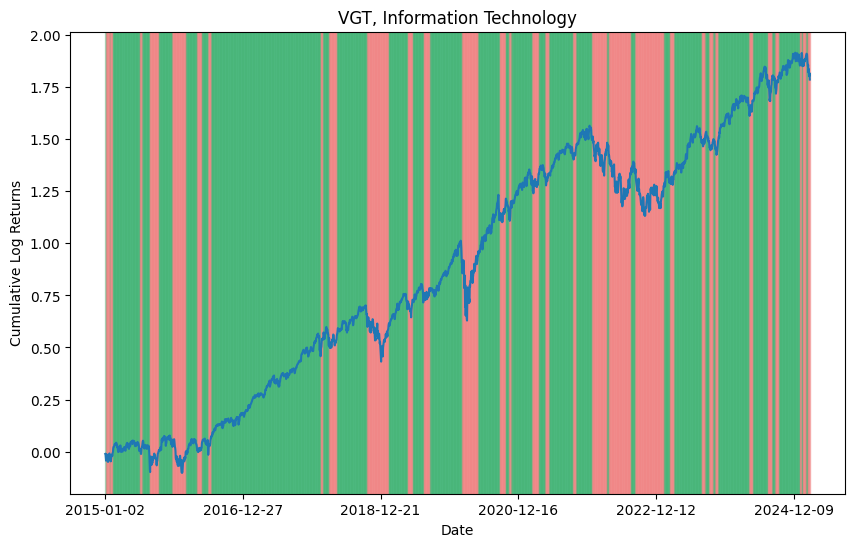

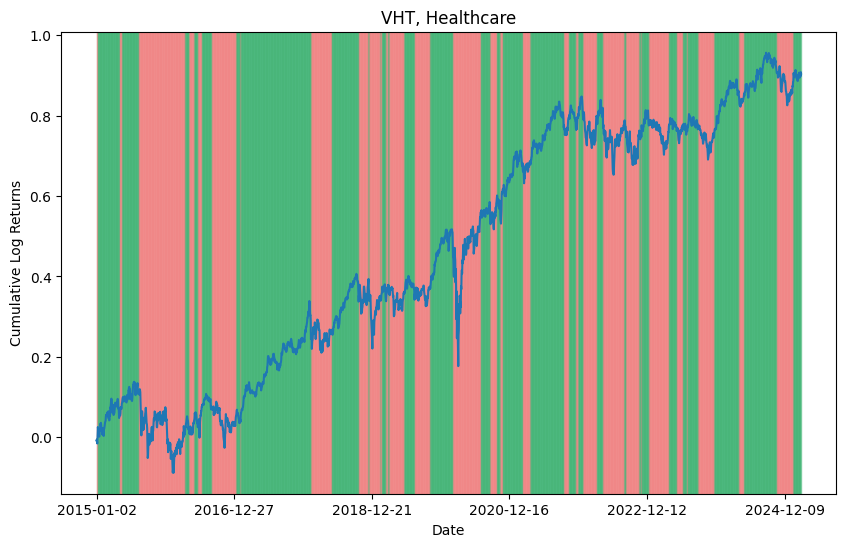

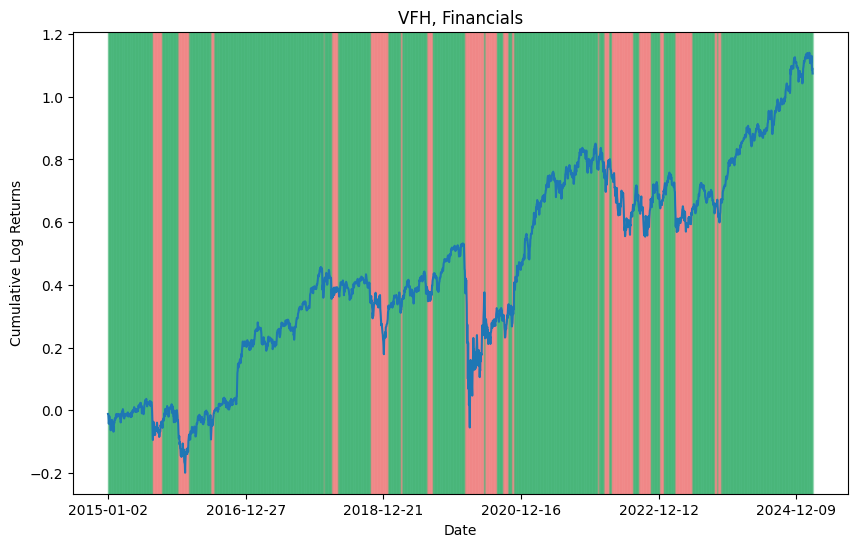

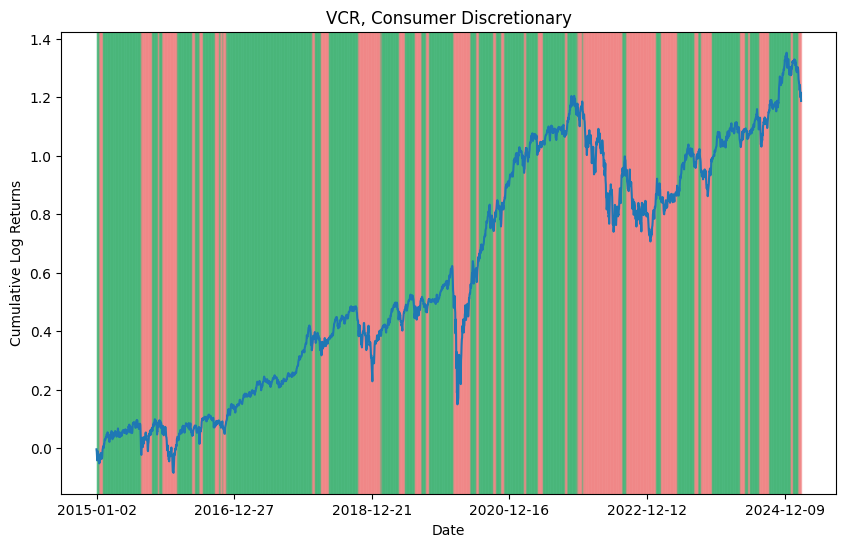

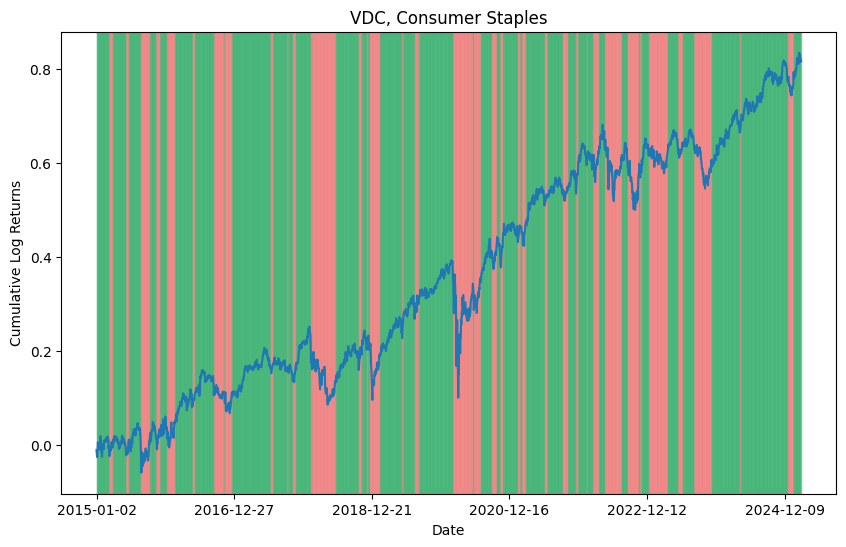

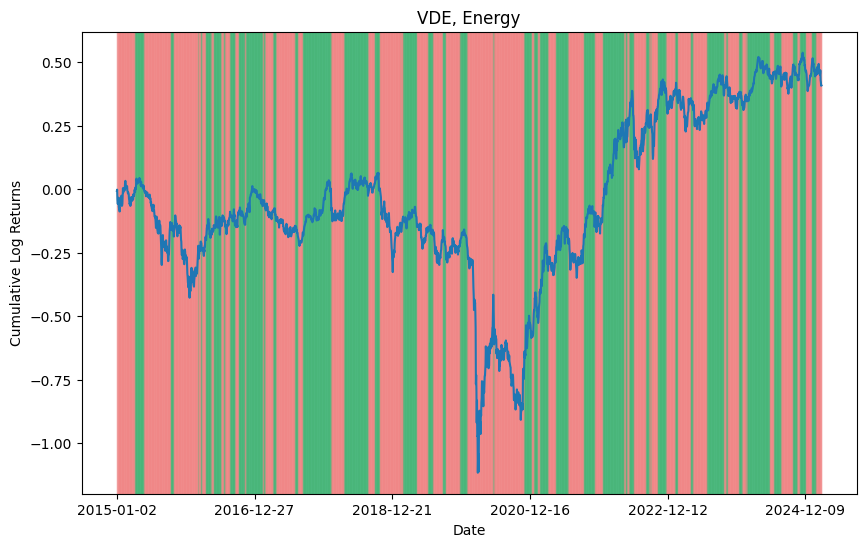

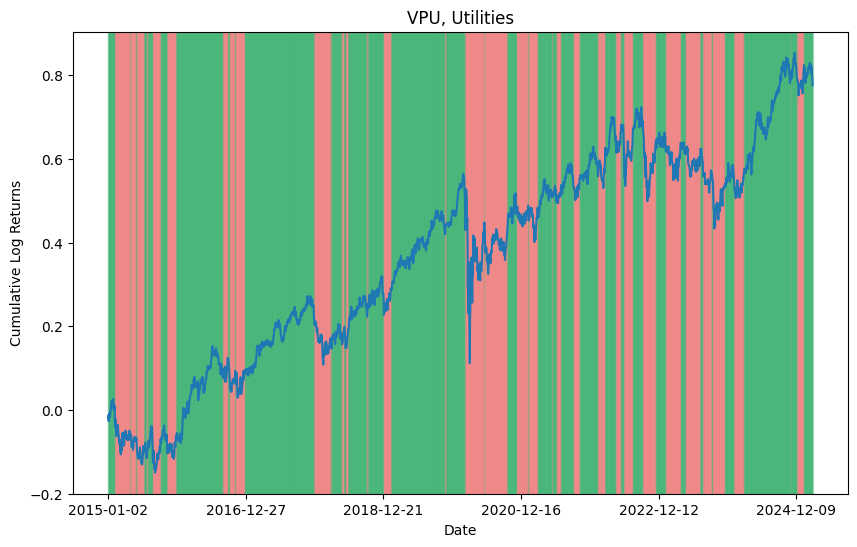

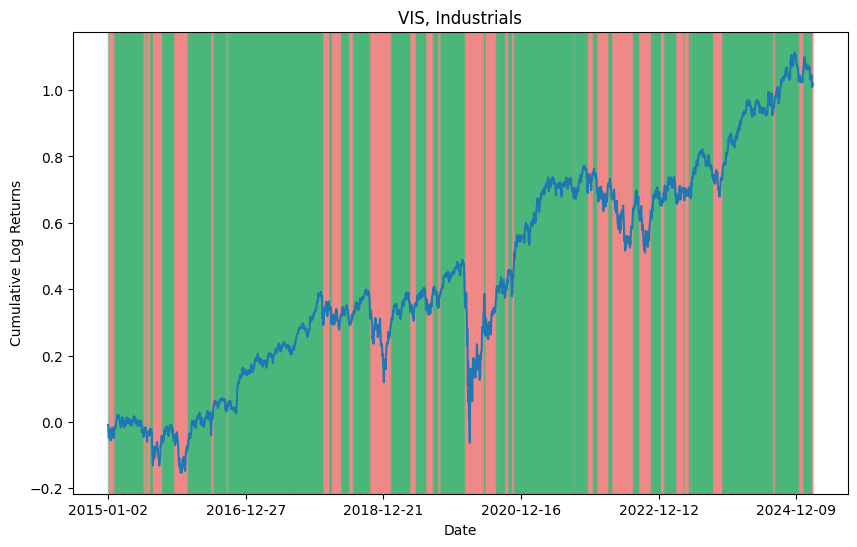

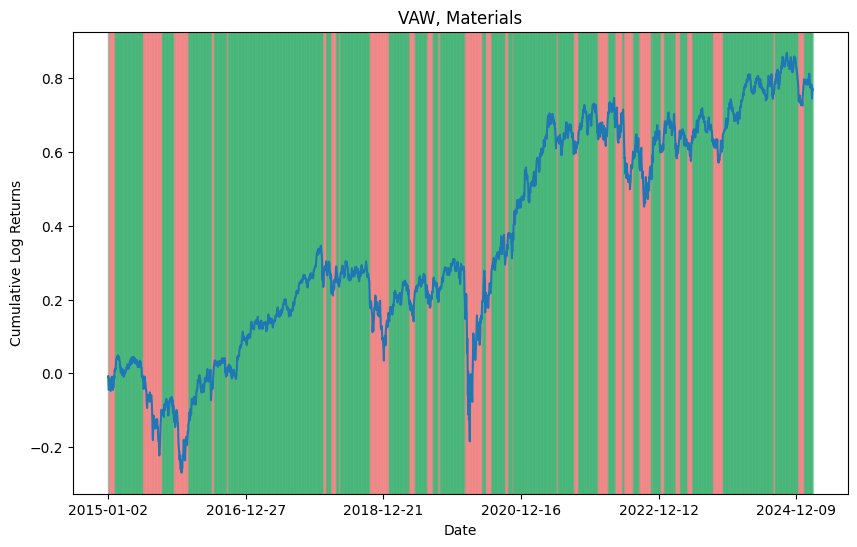

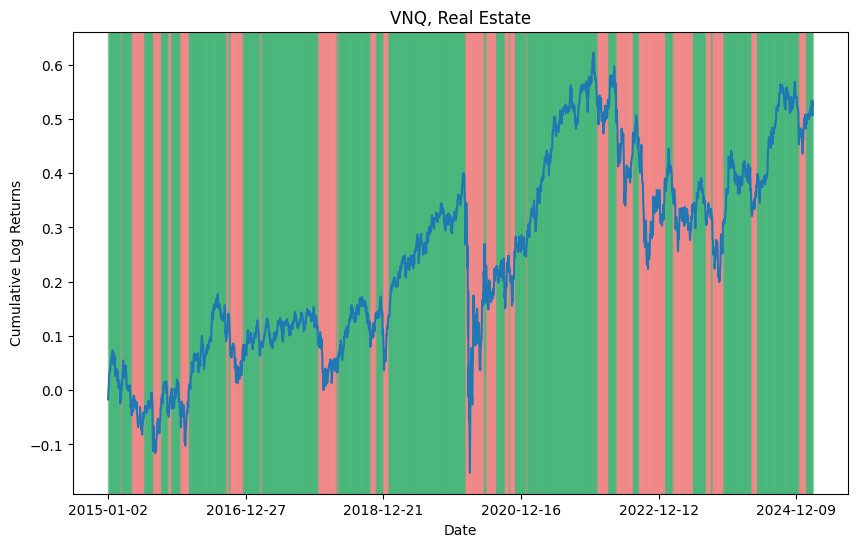

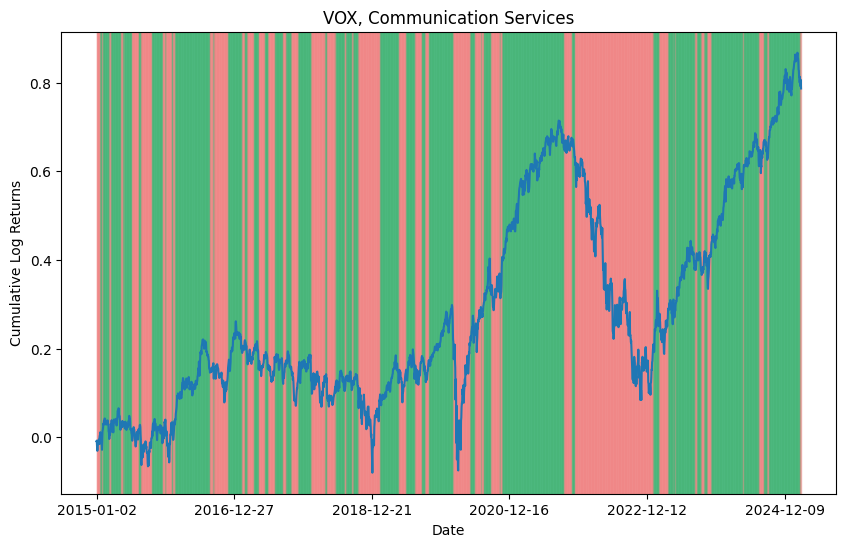

,VGT,VHT,VFH,VCR,VDC,VDE,VPU,VIS,VAW,VNQ,VOX
Date,,,,,,,,,,,
2015-01-02,0,1,0,0,0,1,0,0,0,0,1
2015-01-05,0,1,0,0,0,1,0,0,0,0,1
2015-01-06,0,1,0,0,0,1,0,0,1,0,1
2015-01-07,1,1,0,0,0,1,0,1,1,0,1
2015-01-08,1,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,1,0,0,1,0,1,0,0,0,0,0
2025-03-04,1,0,0,1,0,1,0,1,0,0,1
2025-03-05,1,0,0,1,0,1,0,1,0,0,1


In [154]:
for i in sector_etfs:
    df_i = pd.read_csv(f"data/{i}.csv", index_col="Date")
    #df_i = pd.read_csv(f"data/SPY.csv", index_col="Date")
    #df_i.loc["2005-01-01":"2015-01-01"]
    
    X_train = df_i.loc["2005-01-01":"2015-01-01"]
    X_test = df_i.loc["2015-01-01":]

    clipper = DataClipperStd(mul=3.)
    scalar = StandardScalerPD()
    # fit on training data
    X_train_processed = scalar.fit_transform(clipper.fit_transform(X_train))
    # transform the test data
    X_test_processed = scalar.transform(clipper.transform(X_test))
    
    # set the jump penalty
    jump_penalty=50
    # initlalize the JM instance
    jm = JumpModel(n_components=2, jump_penalty=jump_penalty, cont=True, random_state=42)

    jm.fit(X_train_processed, df_i[f'{i}'], sort_by="cumret")
    #jm.fit(X_train_processed)

    prediction = pd.DataFrame(jm.predict_online(X_test_processed))
    if signals is None:
        prediction.columns = [f'{i}']
        signals = prediction

    else:
        signals[f'{i}'] = prediction
        
    plt.figure(figsize=(10, 6))
    plt.ylabel("Cumulative Log Returns")
    plt.title(f"{i}, {sector_etfs[i]}")
    X_test[f'{i}'].cumsum().plot()  
    for i in range(len(prediction) - 1):
        start_date = prediction.index[i]
        end_date = prediction.index[i + 1]
        # print(df3.iloc[i][0])
        # print(df3.iloc[i][0].dtype)
        color = 'lightcoral' if prediction.iloc[i][0] == 1 else 'mediumseagreen'

        plt.axvspan(start_date, end_date, color=color, alpha=0.3)
        
    plt.show()

signals

In [169]:

df = pd.read_csv(f"data/SPY.csv", index_col="Date").loc["2015-01-02":]['SPY']
for i in sector_etfs:
    df_i = pd.read_csv(f"data/{i}.csv", index_col="Date")
    if df is None:
        df = df_i[i]
    else: 
        df = pd.merge(df, df_i[i], on='Date')
for i in df.columns:
    df[i] = df[i]
df = df.dropna()
df

,SPY,VGT,VHT,VFH,VCR,VDC,VDE,VPU,VIS,VAW,VNQ,VOX
Date,,,,,,,,,,,,
2015-01-02,-0.009973,-0.011041,-0.008484,-0.011600,-0.003160,-0.010090,-0.007230,-0.018490,-0.009318,-0.010283,-0.017015,-0.009282
2015-01-05,-0.000536,-0.002300,0.002306,0.000201,-0.008334,-0.006087,0.005004,0.005554,-0.001780,0.003347,0.014949,0.001651
2015-01-06,-0.018224,-0.017321,-0.004937,-0.018062,-0.018899,-0.008228,-0.040476,-0.013598,-0.023341,-0.028715,0.005458,-0.014720
2015-01-07,-0.009464,-0.012968,-0.004802,-0.013816,-0.010873,-0.000810,-0.015152,0.000590,-0.013239,-0.009019,0.009870,-0.008407
2015-01-08,0.012384,0.008860,0.023702,0.010534,0.016571,0.016322,0.002447,0.010576,0.005820,0.007011,0.015215,0.005532
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,0.015485,0.016018,0.011692,0.019780,0.017523,0.012978,0.015442,0.014095,0.012056,0.009407,0.008449,0.012188
2025-03-04,-0.017675,-0.034197,-0.000184,-0.009721,-0.025529,0.001777,-0.038488,0.001457,-0.018629,-0.021654,0.004675,-0.012631
2025-03-05,-0.011908,-0.000277,-0.008275,-0.035784,-0.016118,-0.015836,-0.007994,-0.015198,-0.017104,-0.016145,-0.011621,-0.007936


In [171]:

def equal_weight_strategy(position_df, returns_df):
    portfolio_returns = []
    for date, row in position_df.iterrows():
        # Identify ETFs with a value of 0 (active positions)
        active_etfs = row[row == 0].index
        weight_vec = None
        if len(active_etfs) > 0:
            # Equal weight for active ETFs
            weight = 1 / len(active_etfs)
            #weight = 1 / 12
            weights = pd.Series(weight, index=active_etfs)

            if weight_vec is None:
                weight_vec = weights
            else:
                weight_vec = pd.concat([weight_vec, weights])
            
            daily_return = (weights * returns_df.loc[date, active_etfs]).sum()
        else:
            daily_return = 0  


    
        portfolio_returns.append(daily_return)
 
    return pd.DataFrame({"Portfolio": portfolio_returns}, index=position_df.index), weight_vec

# Calculate portfolio returns
portfolio_results, weight_vec = equal_weight_strategy(signals, df)

VGT    0.125
VFH    0.125
VCR    0.125
VDC    0.125
VPU    0.125
VIS    0.125
VAW    0.125
VNQ    0.125
dtype: float64
VGT    0.125
VFH    0.125
VCR    0.125
VDC    0.125
VPU    0.125
VIS    0.125
VAW    0.125
VNQ    0.125
dtype: float64
VGT    0.142857
VFH    0.142857
VCR    0.142857
VDC    0.142857
VPU    0.142857
VIS    0.142857
VNQ    0.142857
dtype: float64
VFH    0.2
VCR    0.2
VDC    0.2
VPU    0.2
VNQ    0.2
dtype: float64
VHT    0.166667
VFH    0.166667
VCR    0.166667
VDC    0.166667
VPU    0.166667
VNQ    0.166667
dtype: float64
VHT    0.166667
VFH    0.166667
VCR    0.166667
VDC    0.166667
VPU    0.166667
VNQ    0.166667
dtype: float64
VHT    0.166667
VFH    0.166667
VCR    0.166667
VDC    0.166667
VPU    0.166667
VNQ    0.166667
dtype: float64
VHT    0.166667
VFH    0.166667
VCR    0.166667
VDC    0.166667
VPU    0.166667
VNQ    0.166667
dtype: float64
VHT    0.166667
VFH    0.166667
VCR    0.166667
VDC    0.166667
VPU    0.166667
VNQ    0.166667
dtype: float64
VHT    0.1

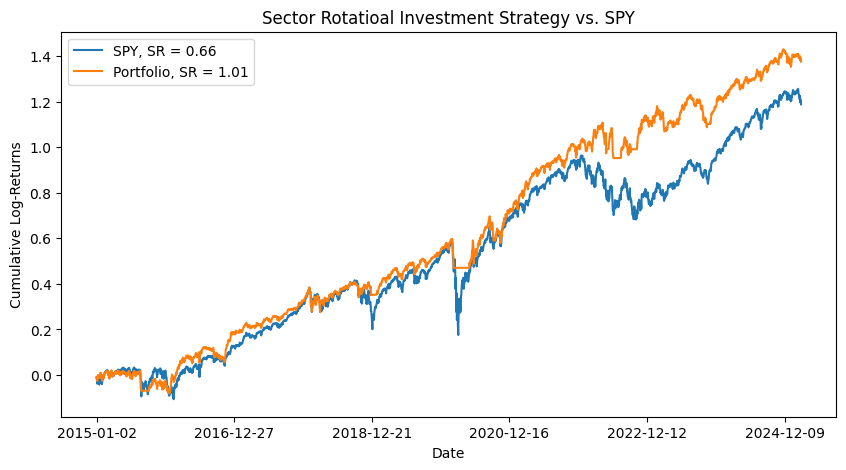

In [187]:
df = df.loc["2015-01-01":]
plt.figure(figsize=(10, 5))
plt.ylabel("Cumulative Log-Returns")
plt.title("Sector Rotatioal Investment Strategy vs. SPY")
df['SPY'].cumsum().plot(label=f'SPY, SR = {round(np.sqrt(252) * df["SPY"].mean()/df["SPY"].std(), 2)}')
portfolio_results['Portfolio'].cumsum().plot(label=f'Portfolio, SR = {round(np.sqrt(252) * portfolio_results["Portfolio"].mean()/portfolio_results["Portfolio"].std(), 2)}')
#df['SECT'].cumsum().plot()
plt.legend()

In [179]:
print("Portfolio Sharpe:", np.sqrt(252) * portfolio_results['Portfolio'].mean()/portfolio_results['Portfolio'].std())

Portfolio Sharpe: 1.008733987085878


In [180]:
print("SPY Sharpe:", np.sqrt(252) * df['SPY'].mean()/df['SPY'].std())

SPY Sharpe: 0.6638832078116775
